# Python Beispiel für Anpassung an eine Kurve (Fitting)

Dieses Notizbuch enthält ein Beispiel für die Darstellung und Anpassung von Daten im Grundpraktikum. Für eine grundlegende Einführung in Python selbst und weitere Details zum Fitten, Plotten und Laden von Daten gibt es ein weiteres Notizbuch namens Einführung_in_python.ipynb


Um diesen Code auszuführen, öffnen Sie ihn in JupyterLab und drücken Sie die Schaltfläche Kernel neu starten und alle Zellen ausführen. Sie können auch einzelne Zellen ausführen, indem Sie Shift+Enter drücken

Ein Einführungsvideo zu JupyterLab finden Sie hier: https://www.youtube.com/watch?v=A5YyoCKxEOU


# Numpy und grafische Darstellung

Wir werden hauptsächlich mit dem `numpy`-Paket für numerische Berechnungen und dem `matplotlib`-Paket für die grafische Darstellung arbeiten. Beide sind auf dem OLAT Jupyterhub vorinstalliert. Wir können diese Pakete mit den folgenden Import-Anweisungen laden:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

Der Datentyp in Numpy, der einen Vektor oder eine Matrix entspricht, ist `np.array`. Wir können Array-Variablen wie unten gezeigt erzeugen. 

- Die Standardoperationen sind elementweise, also multipliziert `x*y` zwei np.array-Variablen elementweise und ist keine Matrixmultiplikation!
- In Python ist der Potenzoperator `**`, also ist das Quadrat der Variablen `x` ist dann `x**2`.

Hier erzeugen wir Variablen mit einigen 'gemessenen' Daten `x`, `y` und der Ungenauigkeit `y_err`. Aus der Unsicherheit berechnen wir die sogenannten „Gewichte“, die für Anpassungsroutinen verwendet werden. 

In [2]:
x = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,10.0 ])
y = np.array([ 5.5, 7.3, 10.3, 12.3, 12.7, 18.1, 23.3, 25.0, 36.0, 31.3])
y_err=1.5*np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) #uncertainties in period values (one standard deviation) 
weights=1/(y_err) #conversion to the 'weights' that Python uses for fitting. Python uses weighted least-square fitting https://en.wikipedia.org/wiki/Weighted_least_squares
# The np.polyfit function uses a non standard definition of the weights: weights = 1/sigma (Usually the weights are defined as the squares of this)


Wir können die Daten mit der Funktion `plt.plot` darstellen.

- Fehlerbalken können mit der Funktion `plt.errorbar` dargestellt werden.
- Wir können die Linie mit `linestyle='none'` entfernen
- Die Markierung kann mit `marker='d'` auf Diamant gesetzt werden.

Text(0, 0.5, 'Spannung ($\\mu$V)')

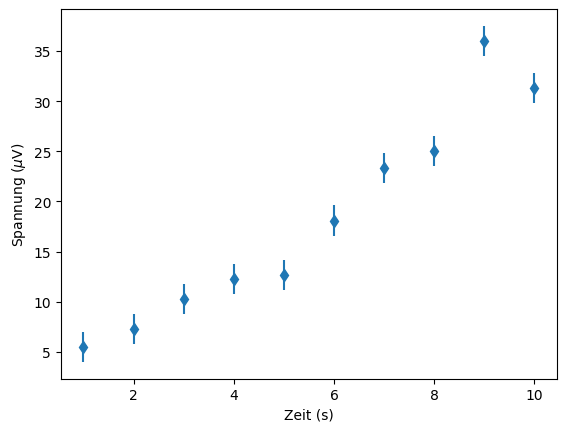

In [3]:
plt.errorbar(x,y,yerr=y_err,marker='d',linestyle='none')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung ($\\mu$V)')

# Anpassung con Daten an eine Funktion

Mit der Funktion `np.polyfit` können wir ein Polynom mit einem bestimmten Grad an die Daten anpassen. Der Funktionsparameter, der den Grad des Polynom angibt ist `deg`.

Die Dokumentation für die polyfit-Funktion: https://numpy.org/doc/2.0/reference/generated/numpy.polyfit.html

Die Anpassung liefert die optimalen Parameter, die wir in der Variablen `params` und die Kovarianzmatrix in der Variablen `cov_mat` speichern. Wie wir sehen werden, kann mittels der Kovarianzmatrix die Unsicherheit der angepassten Parameters ermittelt werden.

In [4]:
params, cov_mat = np.polyfit(x,y,deg=1,w=weights,cov=True)

Die angepassten Parameter des Polygons befinden sich dann in der Liste `params`. Wir können auf sie mit `params[i]` zugreifen. Bei der Anpassung an eine lineare Funktion $f(x) = a + b \cdot x$ entspricht `params[1]` $a$ und `params[0]` entspricht $b$.

In [5]:
a = params[1]
b = params[0]
print(f'Fit result: a:{a:.3f} and b:{b:.3f}')

Fit result: a:0.013 and b:3.303


Die Unsicherheit der angepassten Parameter ist durch die *Kovarianzmatrix* gegeben, die in der Variablen `cov_mat` gespeichert ist. Für das Grundpraktikum I können wir alle Korrelationen zwischen den Parametern ignorieren, so dass die Unsicherheit die Quadratwurzel aus den Diagonaleinträgen der Kovarianzmatrix ist.

In [6]:
sigma_a = np.sqrt(cov_mat[1,1])
sigma_b = np.sqrt(cov_mat[0,0])

print(f'Fit result: a:{a:.3f} ± {sigma_a:.3f} and b:{b:.3f} ± {sigma_b:.3f}')

Fit result: a:0.013 ± 1.995 and b:3.303 ± 0.321


Um die Funktion mit den angepassten Parametern darzustellen, müssen wir einen neuen Datensatz für die $x$ und $y$ Werte erzeugen. Generell will man für die Darstellung der Funktion mehr Werte auf der $x$ Achse verwednen, als im urpsrünglichen Datensatz sind. Deshalb erzeugen wir mit der Funktion „np.linspace“ ein mehrere x-Werte erzeugen.

Die Dokumentation für die Linspace-Funktion: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

Die $y$ Werte der angepassten Funktion können nun mithilfe der Funktion `np.polyval` erzeugt werden. Diese Funktion berechnet das Polynom, dass durch die Variable `params` gegeben wird, für alle erzeugten `x` Werte.

In [7]:
x_fine = np.linspace(0,10,num=100)
y_fit = np.polyval(params, x_fine)

Wir können dann die Anpassung und die Originaldaten in derselben Abbildung darstellen. Die Darstellung kann mit „plt.savefig“ in eine PDF-Datei gespeichert werden.

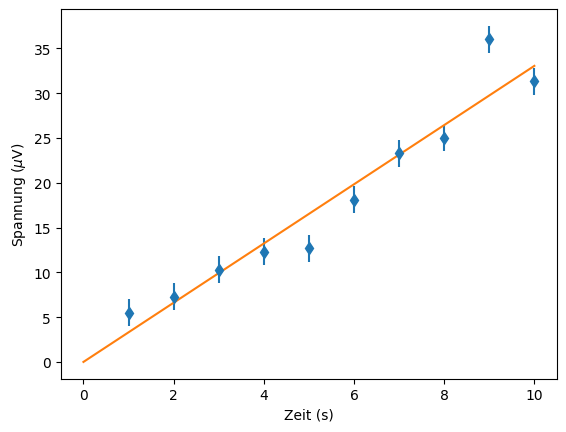

In [8]:
plt.errorbar(x,y,yerr=y_err,marker='d', linestyle='none')
plt.plot(x_fine, y_fit)
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung ($\\mu$V)')
plt.savefig('linear_fit.pdf')

## Anmerkung: Anpassung beliebiger Funktionen

Um eine beliebige Funktion (kein Polynom) anzupassen, kann die Funktion `curve_fit` aus dem Paket `scipy.optimize` verwendet werden. 

Dokumentation für curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Hier ist ein Beispiel für die Verwendung von `curve_fit`, um eine lineare Anpassung zu erstellen. 


1. Importieren Sie die Funktion curve_fit

2. Definieren Sie die Anpassungsfunktion `func`.

3. Definieren Sie die Anfangswerte

4. Durchführen der Anpassung


Dieses Verfahren kann an komplexere Funktionen, wie Sinus oder Exponential angepasst werden

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b): 
    c = 1 * b   
    return a * x + c

InitialValues = [1,0]
OptimalValues, CovarianceMatrix = curve_fit(func,x,y,sigma=y_err, p0 = InitialValues)
print(OptimalValues)

[3.30303025 0.01333376]
